## Libraries

In [60]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import missingno as msn
import plotly.express as px

## Dataset

In [8]:
gap = pd.read_csv("global air pollution dataset.csv")

In [11]:
gap.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [67]:
gap.shape

(23035, 12)

In [68]:
gap.dtypes.value_counts()

object    7
int64     5
dtype: int64

## About 

**Air quality index (AQI)** - An air quality index (AQI) indicates how polluted the air currently is or how polluted it is forecast to become. The AQI is calculated based on the levels of several air pollutants, including particulate matter (PM2.5 and PM10), ozone (O3), nitrogen dioxide (NO2), sulfur dioxide (SO2), and carbon monoxide (CO).

**AQI Category** - The category in which the AQI belongs to.

**CO AQI** -  CO AQI specifically refers to the Air Quality Index value calculated based on the levels of carbon monoxide in the air. Carbon monoxide is a poisonous gas that is emitted by vehicles, generators, and other combustion sources.

> *CO AQI Range: 0 to 500, where higher values indicate higher levels of carbon monoxide pollution ; < 50 - Good*

**Ozone AQI** - Ozone AQI refers to the Air Quality Index value calculated based on the levels of ozone (O3) in the air. Ozone is a highly reactive gas that is created by the interaction of sunlight with pollutants emitted by vehicles, industrial processes, and other sources.

> *Ozone AQI Range: 0 to 500, where higher values indicate higher levels of carbon monoxide pollution ; > 100 - **unhealthy for sensitive groups and can cause health problems for people with respiratory or cardiovascular conditions**.< 50 - Good*.
Ozone pollution is a particular concern during the summer months when sunlight and hot weather can cause ozone levels to rise. It's important to monitor air quality levels and take necessary precautions when the AQI is high, such as limiting outdoor activity or wearing a mask.

**Respiratory conditions** - *Asthma, Chronic obstructive pulmonary disease (COPD) affect the lungs and airways which causes inflammation making it harder to breathe*

#### Cardiovascular Conditions - Irregular heart rhythms, reduced heart function, inflammation etc.

**NO2 AQI** - NO2 AQI refers to the Air Quality Index value calculated based on the levels of nitrogen dioxide (NO2) in the air. Nitrogen dioxide is a highly reactive gas that is emitted by vehicles, power plants, and other combustion sources.

> *NO2 AQI Range: 0 to 500, where higher values indicate higher levels of carbon monoxide pollution ; > 100 - **unhealthy for sensitive groups and can cause health problems for people with respiratory or cardiovascular conditions**.< 50 - Good*.
Nitrogen dioxide can also react with other pollutants **to form ground-level ozone**, which can cause respiratory problems and other health effects.

**PM2.5** - Atmospheric Particulate Matter, also known as atmospheric aerosol particles, are complex mixtures of small solid and liquid matter that get into the air. If inhaled they can cause serious heart and lungs problem. They have been classified as **group 1 carcinogen by the International Agengy for Research on Cancer (IARC)**.It can come from a variety of sources, including vehicle exhaust, **power plants**, wildfires, and dust. PM2.5 refers to those particles with a diameter of 2.5 micrometers or less.

https://acp.copernicus.org/preprints/acp-2020-672/acp-2020-672-manuscript-version4.pdf

https://www.google.com/search?q=pm+value+of+plastic+burn&client=firefox-b-d&ei=DU4kZMC8O8ONseMP_7CvuAo&ved=0ahUKEwiA95LAr4H-AhXDRmwGHX_YC6cQ4dUDCA4&uact=5&oq=pm+value+of+plastic+burn&gs_lcp=Cgxnd3Mtd2l6LXNlcnAQAzIFCCEQoAEyBQghEKABOgoIABBHENYEELADOhkIABCKBRDqAhC0AhCKAxC3AxDUAxDlAhgBOhMIABCPARDqAhC0AhCMAxDlAhgCOhMILhCPARDqAhC0AhCMAxDlAhgCOgcIABCKBRBDOggIABCKBRCRAjoLCC4QigUQsQMQgwE6CwgAEIAEELEDEIMBOg0IABCKBRCxAxCDARBDOggILhCABBCxAzoLCC4QgAQQsQMQ1AI6CwguEIAEELEDEIMBOg0ILhCKBRCxAxCDARBDOgUILhCABDoJCAAQigUQChBDOg0ILhCKBRDHARCvARBDOggIABCABBCxAzoFCAAQgAQ6DQguEIAEEMcBEK8BEAo6EAguEK8BEMcBELEDEIAEEAo6BggAEBYQHjoICAAQFhAeEA86CAgAEIoFEIYDOggIIRAWEB4QHToHCCEQoAEQCjoKCCEQFhAeEA8QHUoECEEYAEoFCEASATFQ1AZY4llgolxoCXABeACAAZgBiAGdGpIBBDAuMjeYAQCgAQGwARTIAQjAAQHaAQQIARgH2gEGCAIQARgK&sclient=gws-wiz-serp






In [28]:
gap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


## Overview

> **Features** - 12, **Instances** - 23463
  
> **Numerical** - 5:     [**AQI Value, CO AQI Value, Ozone AQI Value, NO2 AQI Value, PM 2.5 AQI Value**]

> **Categorical** - 7:  [**Country, City, AQI Category, CO AQI Category, Ozone AQI Category, NO2 AQI Category, PM 2.5 AQI Category**]




## AQI Value Indications

The AQI Value ranging from: 

> 0 to 50 - Good 

> 51 to 100 - Moderate

> 101 to 150 - Unhealthy for sensitive groups

> 151 to 200 - Unhealthy

> 201 to 300 - Very Unhealthy

> 301 to 500 - Hazardous

## Data Cleaning

The Aim is to ensure the following for making it suitable for analysis and modeling

> No duplicates 

> No missing values

> Dataset with proper datatypes

In [18]:
# check for duplicates
dup = gap[gap.duplicated()]
dup

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category


In [19]:
# check for missing values
gap.isnull().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

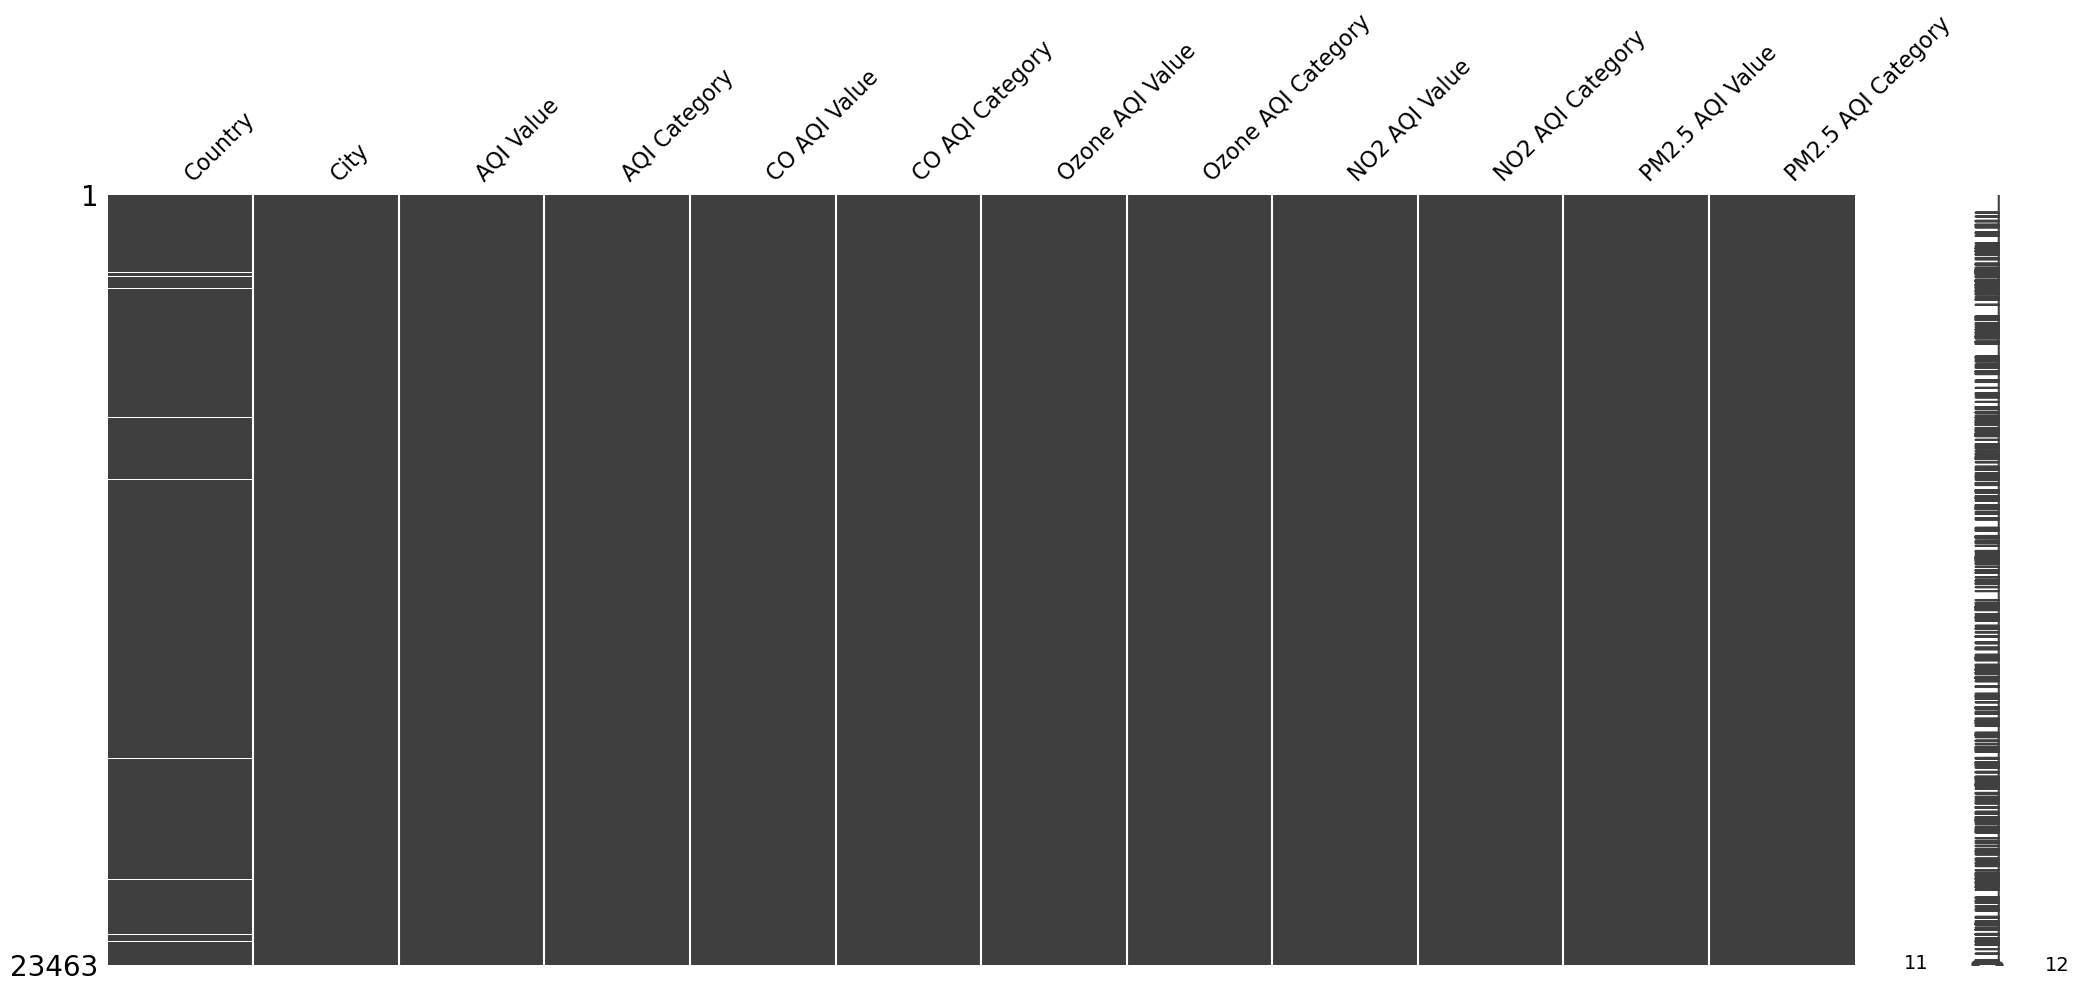

In [20]:
msn.matrix(gap);

In [47]:
print("Missing value count:")
print("--------------------")
print("Country: - 427")
print("City: - 1")

Missing value count:
--------------------
Country: - 427
City: - 1


In [29]:
# dropping the records
gap.dropna(axis=0, how='any',inplace=True)

In [49]:
# new dimension
new_dim = gap.shape
print("New dimensions of the Dataset: ", new_dim)
print("The Records got reduced from 23,463 to 23,035")

New dimensions of the Dataset:  (23035, 12)
The Records got reduced from 23,463 to 23,035


In [69]:
# crosscheck for null values
gap.isnull().sum()

Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
dtype: int64

In [38]:
# check for proper datatypes
gap.dtypes

Country               object
City                  object
AQI Value              int64
AQI Category          object
CO AQI Value           int64
CO AQI Category       object
Ozone AQI Value        int64
Ozone AQI Category    object
NO2 AQI Value          int64
NO2 AQI Category      object
PM2.5 AQI Value        int64
PM2.5 AQI Category    object
dtype: object

### Statistical Analysis

In [39]:
gap.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23035.000000,23035.000000,23035.000000,23035.000000,23035.000000
mean,72.344693,1.376254,35.233905,3.084741,68.883482
std,56.360992,1.844926,28.236613,5.281708,55.057396
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,80.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


In [22]:
pd.set_option("display.max_rows", None)

In [27]:
gap['Country'].value_counts(ascending=False)

United States of America                                2872
India                                                   2488
Brazil                                                  1562
Germany                                                 1345
Russian Federation                                      1241
Italy                                                    979
France                                                   802
China                                                    795
Japan                                                    702
Mexico                                                   588
Spain                                                    425
United Kingdom of Great Britain and Northern Ireland     400
Poland                                                   389
Indonesia                                                379
Philippines                                              337
Pakistan                                                 307
Netherlands             